In [967]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

EDA

In [968]:
# load the data
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [969]:
# get all the unique values for 'ocean_proximity' col
print(f"{df['ocean_proximity'].unique()}, {df['ocean_proximity'].nunique()} unique values")


['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND'], 5 unique values


Preparing the dataset

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

In [970]:
df = df[(df['ocean_proximity'] == "<1H OCEAN") | (df['ocean_proximity'] =="INLAND")]
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

In [971]:
# df = df[[
# 'latitude',
# 'longitude',
# 'housing_median_age',
# 'total_rooms',
# 'total_bedrooms',
# 'population',
# 'households',
# 'median_income',
# 'median_house_value']]
df = df.loc[:, df.columns !='ocean_proximity']
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


Number of columns?

In [972]:
df.shape[1]

9

Question 1

In [973]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Question 2
What's the median (50% percentile) for variable 'population'?

In [974]:
df.population.median()

1195.0

/Users/debbose/projects/MLZoomcamp/MLZoomcamp/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/debbose/projects/MLZoomcamp/MLZoomcamp/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

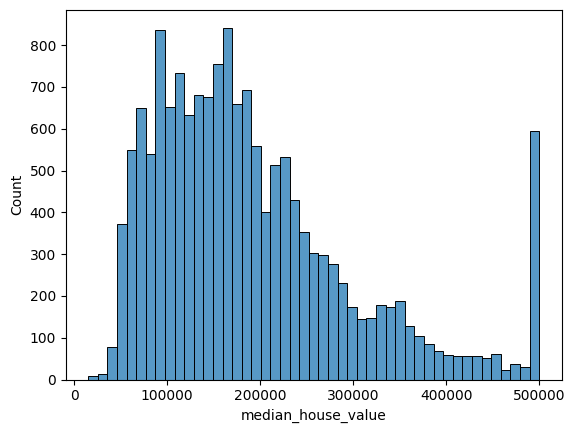

In [975]:
sns.histplot(df.median_house_value)

Prepare and split the dataset

1. Shuffle the dataset (the filtered one you created above), use seed 42.
2. Split your data in train/val/test sets, with 60%/20%/20% distribution.
3. Apply the log transformation to the _median_house_value_ variable using the np.log1p() function.

In [976]:
# set seed for reproducibility
seed = 42

#1. Shuffle the dataset (the filtered one you created above), use seed 42.
def set_seed(seed):
    np.random.seed(seed)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

In [977]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
n = len(df_shuffled)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test
#check if total sample = validation+test+train samples 
assert(n == (n_val+n_test+n_train))

In [978]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


df_train = df_train.reset_index(drop=True)
df_val= df_val.reset_index(drop=True)
df_test= df_test.reset_index(drop=True)

In [979]:
#3. Apply the log transformation to the _median_house_value_ variable using the np.log1p() function.
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)
df_train

# need to delete as this should not ba part of the training 
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


Question 3
1. We need to deal with missing values for the column from Q1.
2. We have two options: fill it with 0 or with the mean of this variable.
3. Try both options. For each, train a linear regression model without regularization using the code from the lessons.
4. For computing the mean, use the training only!
5. Use the validation dataset to evaluate the models and compare the RMSE of each option.
6. Round the RMSE scores to 2 decimal digits using round(score, 2)
7. Which option gives better RMSE?

In [980]:
df_test.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        25
population             0
households             0
median_income          0
dtype: int64

## Linear Regression

In [981]:
#linear regression function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [982]:
#
def prepare_X(df, fillna_val):
    df_num = df.fillna(fillna_val)
    return df_num.values

In [983]:
# mean of df_shuffled 
df_train_mean = df_train.total_bedrooms.mean()
df_train_mean

542.3408505154639

In [984]:
#RMSE
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [985]:
# fill missing values with 0 and check the value
# fill missing values with df_train_mean and check the value
# both seems same value.
X_train = prepare_X(df_train, 0)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

rmse_train = rmse(y_train, y_pred)
round(rmse_train, 2)


0.34

In [986]:
#validation 
X_val = prepare_X(df_val, 0)
y_pred = w_0 + X_val.dot(w)
rmse_val = rmse(y_val, y_pred)
round(rmse_val, 2)

0.34

/Users/debbose/projects/MLZoomcamp/MLZoomcamp/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/debbose/projects/MLZoomcamp/MLZoomcamp/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/debbose/projects/MLZoomcamp/MLZoomcamp/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/debbose/projects/MLZoomcamp/MLZoomcamp/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: F

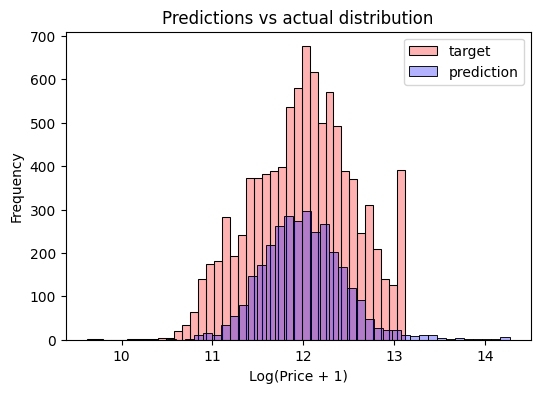

In [987]:
#plot figure 

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='Red', alpha=0.3, bins=40)
sns.histplot(y_pred, label='prediction', color='Blue', alpha=0.3, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [988]:
X_val = prepare_X(df_val, 0)
y_pred = w_0 + X_val.dot(w)

## Question 4
1. Now let's train a regularized linear regression.
2. For this question, fill the NAs with 0.
3. Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
4. Use RMSE to evaluate the model on the validation dataset.
5. Round the RMSE scores to 2 decimal digits.
6. Which r gives the best RMSE?

In [989]:
## Regularization
# 1. Now let's train a regularized linear regression.
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [990]:
# 2. For this question, fill the NAs with 0.#
X_train = prepare_X(df_train, fillna_val=0)

In [991]:
#3. Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].

X_train = prepare_X(df_train, 0)
X_val = prepare_X(df_val, 0)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

     0 0.34144077240891735
 1e-06 0.34144076818569163
0.0001 0.34144035052197574
 0.001 0.3414365898139638
  0.01 0.3414024465178654
   0.1 0.34130897274150945
     1 0.34343293852427464
     5 0.34572535051822356
    10 0.3462146172028343


In [992]:
X_train = prepare_X(df_train, 0)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val, 0)
y_pred = w_0 + X_val.dot(w)
print('validation:',round( rmse(y_val, y_pred),2))

X_test = prepare_X(df_test, 0)
y_pred = w_0 + X_test.dot(w)
print('test:', round(rmse(y_test, y_pred), 2))

validation: 0.34
test: 0.34


Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [993]:
#0

In [995]:

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
def predict(seed, fill_na=0):
    set_seed(seed=seed)
    X_train = prepare_X(df_train, fillna_val=fill_na)
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_train.dot(w)

    rmse_train = rmse(y_train, y_pred)


    #validation 
    X_val = prepare_X(df_val, 0)
    y_pred = w_0 + X_val.dot(w)
    return rmse(y_val, y_pred)

sd_val = [predict(seed=seed) for seed in seeds]
sd_val





[0.34144077240891735,
 0.34144077240891735,
 0.34144077240891735,
 0.34144077240891735,
 0.34144077240891735,
 0.34144077240891735,
 0.34144077240891735,
 0.34144077240891735,
 0.34144077240891735,
 0.34144077240891735]